<a href="https://colab.research.google.com/github/aditipriya25/CodSoft_DS_01/blob/main/CodSoft_DS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize,word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv('/content/IMDb Movies India.csv')

In [ ]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
data.shape

(15509, 10)

In [ ]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data.duplicated().sum()

6

In [ ]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:

cat_cols = data.select_dtypes(include='object').columns
print(cat_cols)

num_cols = data.select_dtypes(exclude='object').columns
print(num_cols)

Index(['Name', 'Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')
Index(['Rating'], dtype='object')


In [ ]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
data.describe(include='object')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


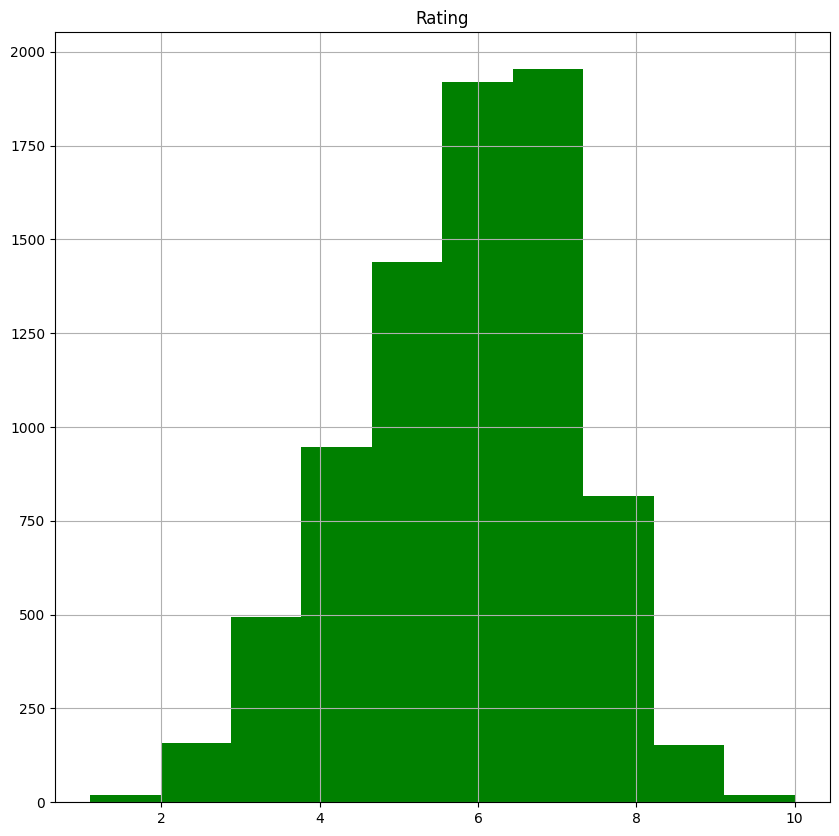

In [ ]:
data.hist(figsize=(10,10),color='green')
plt.show()

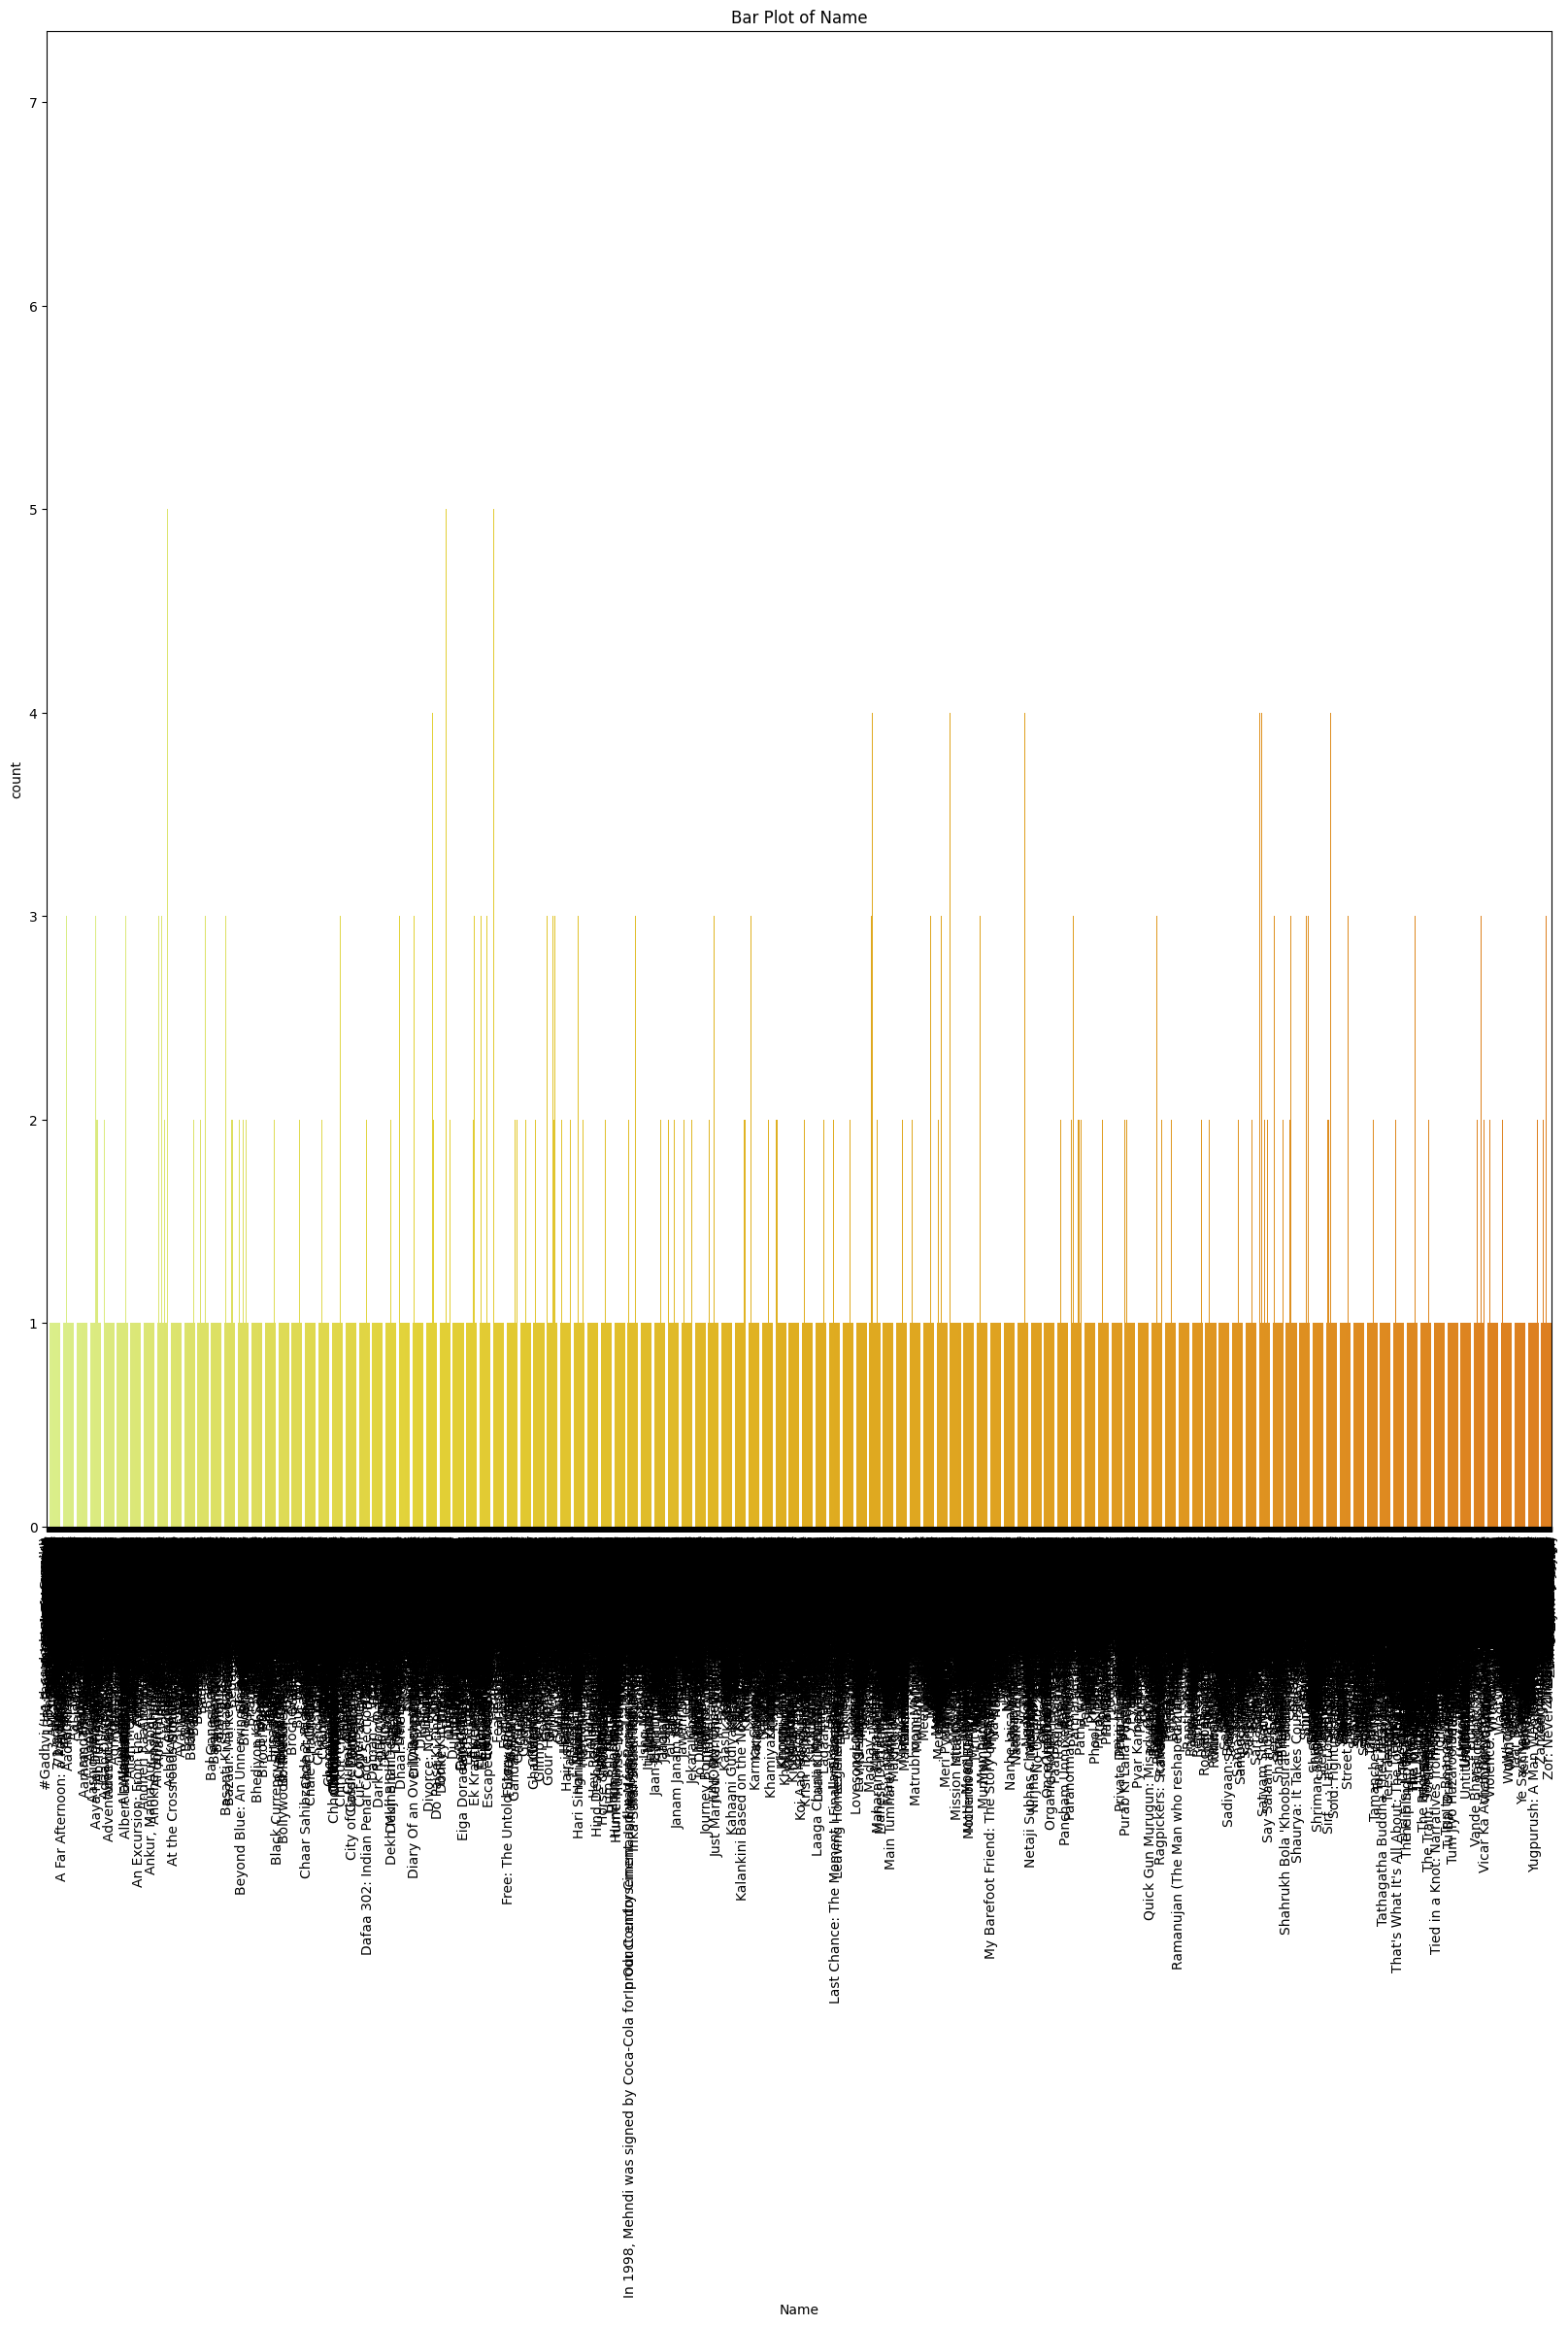

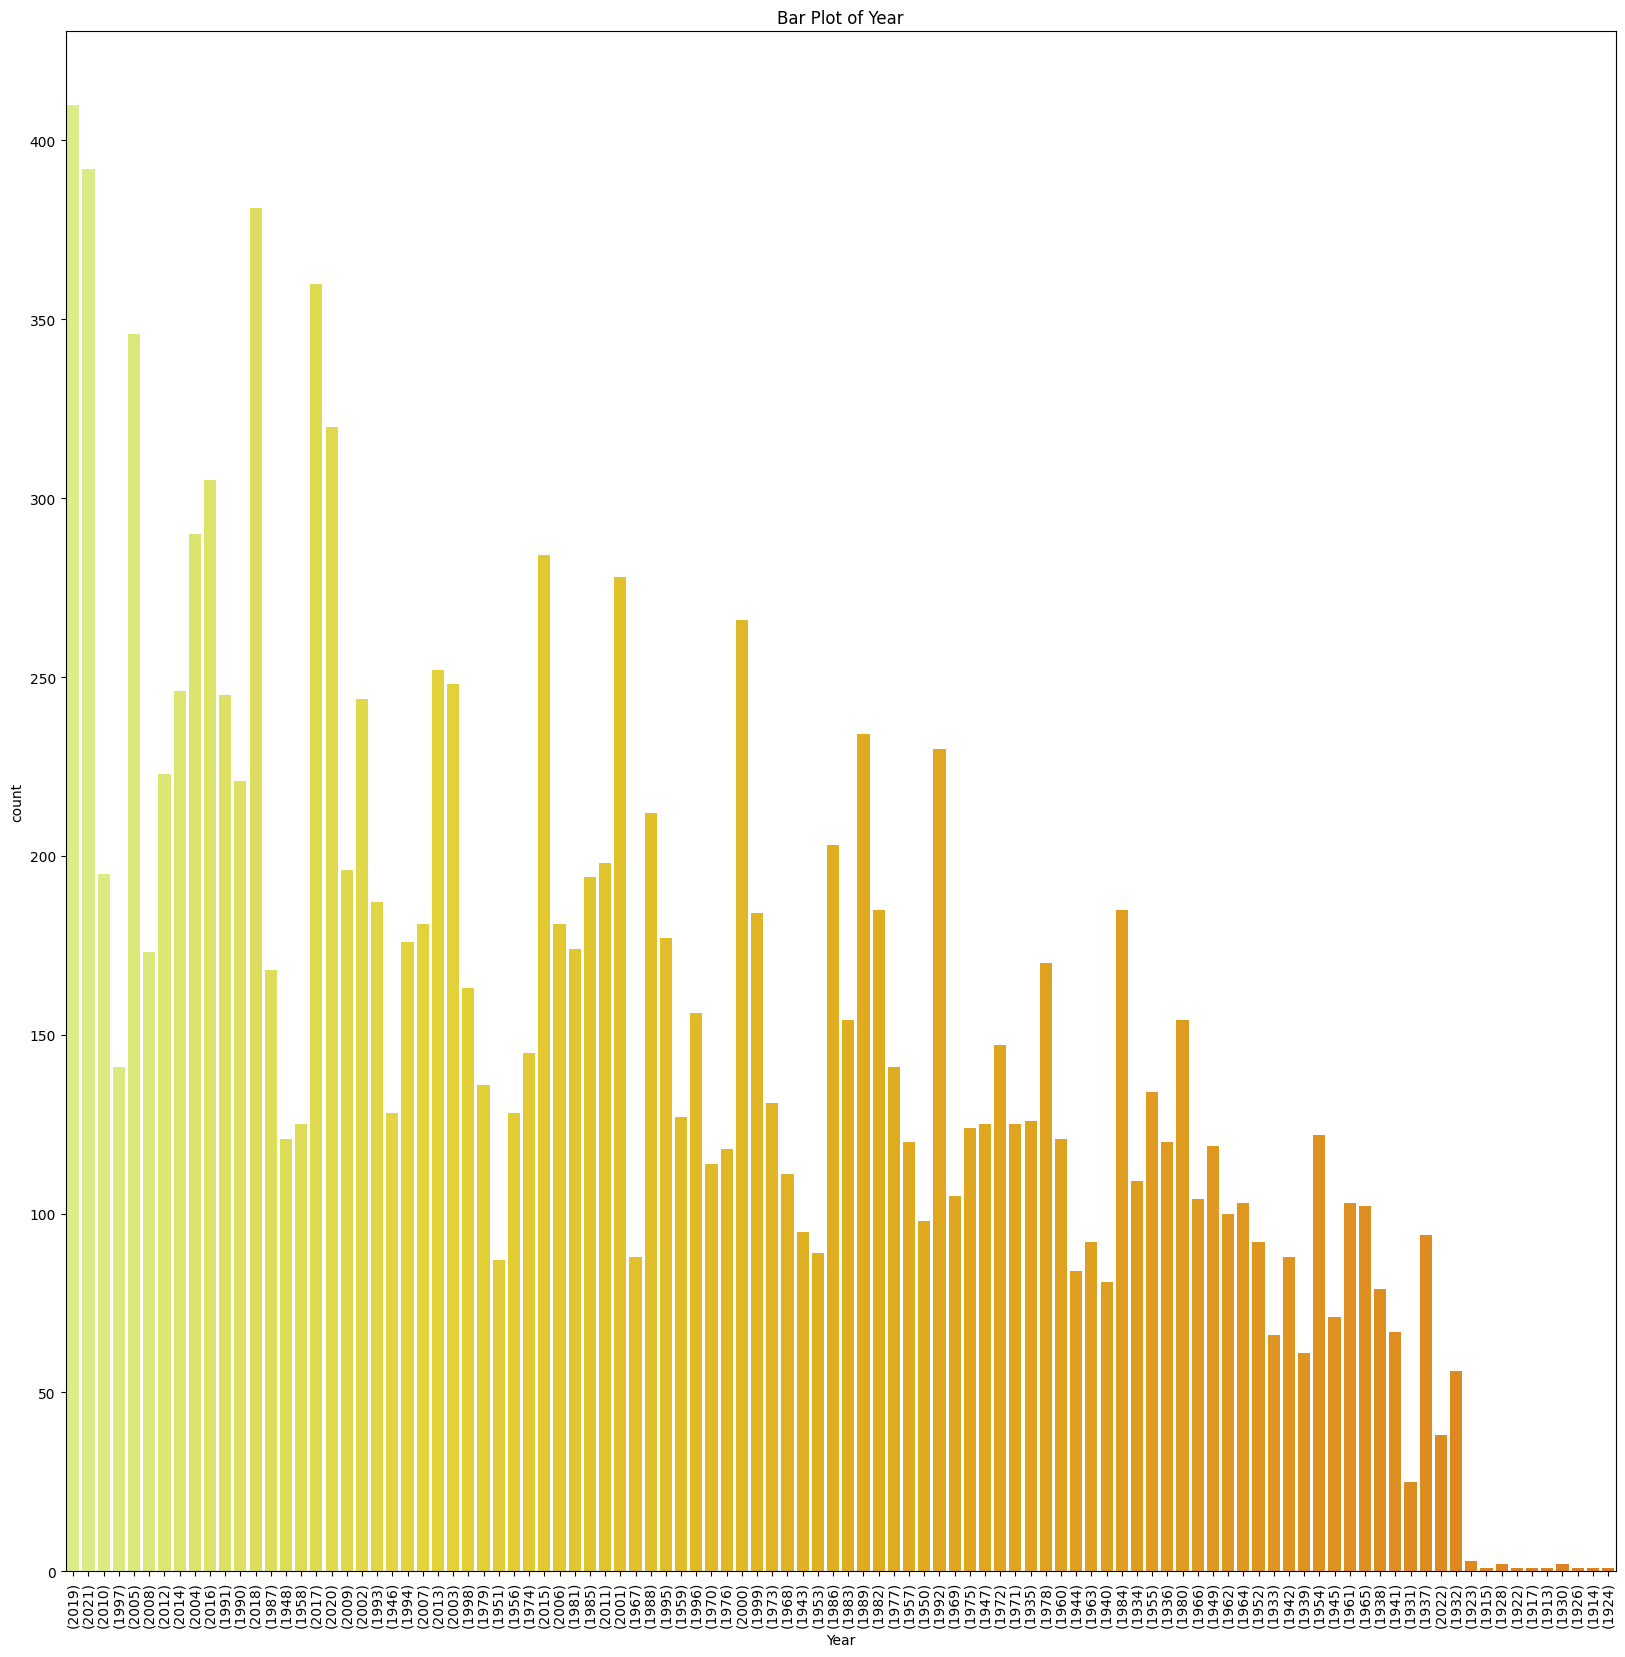

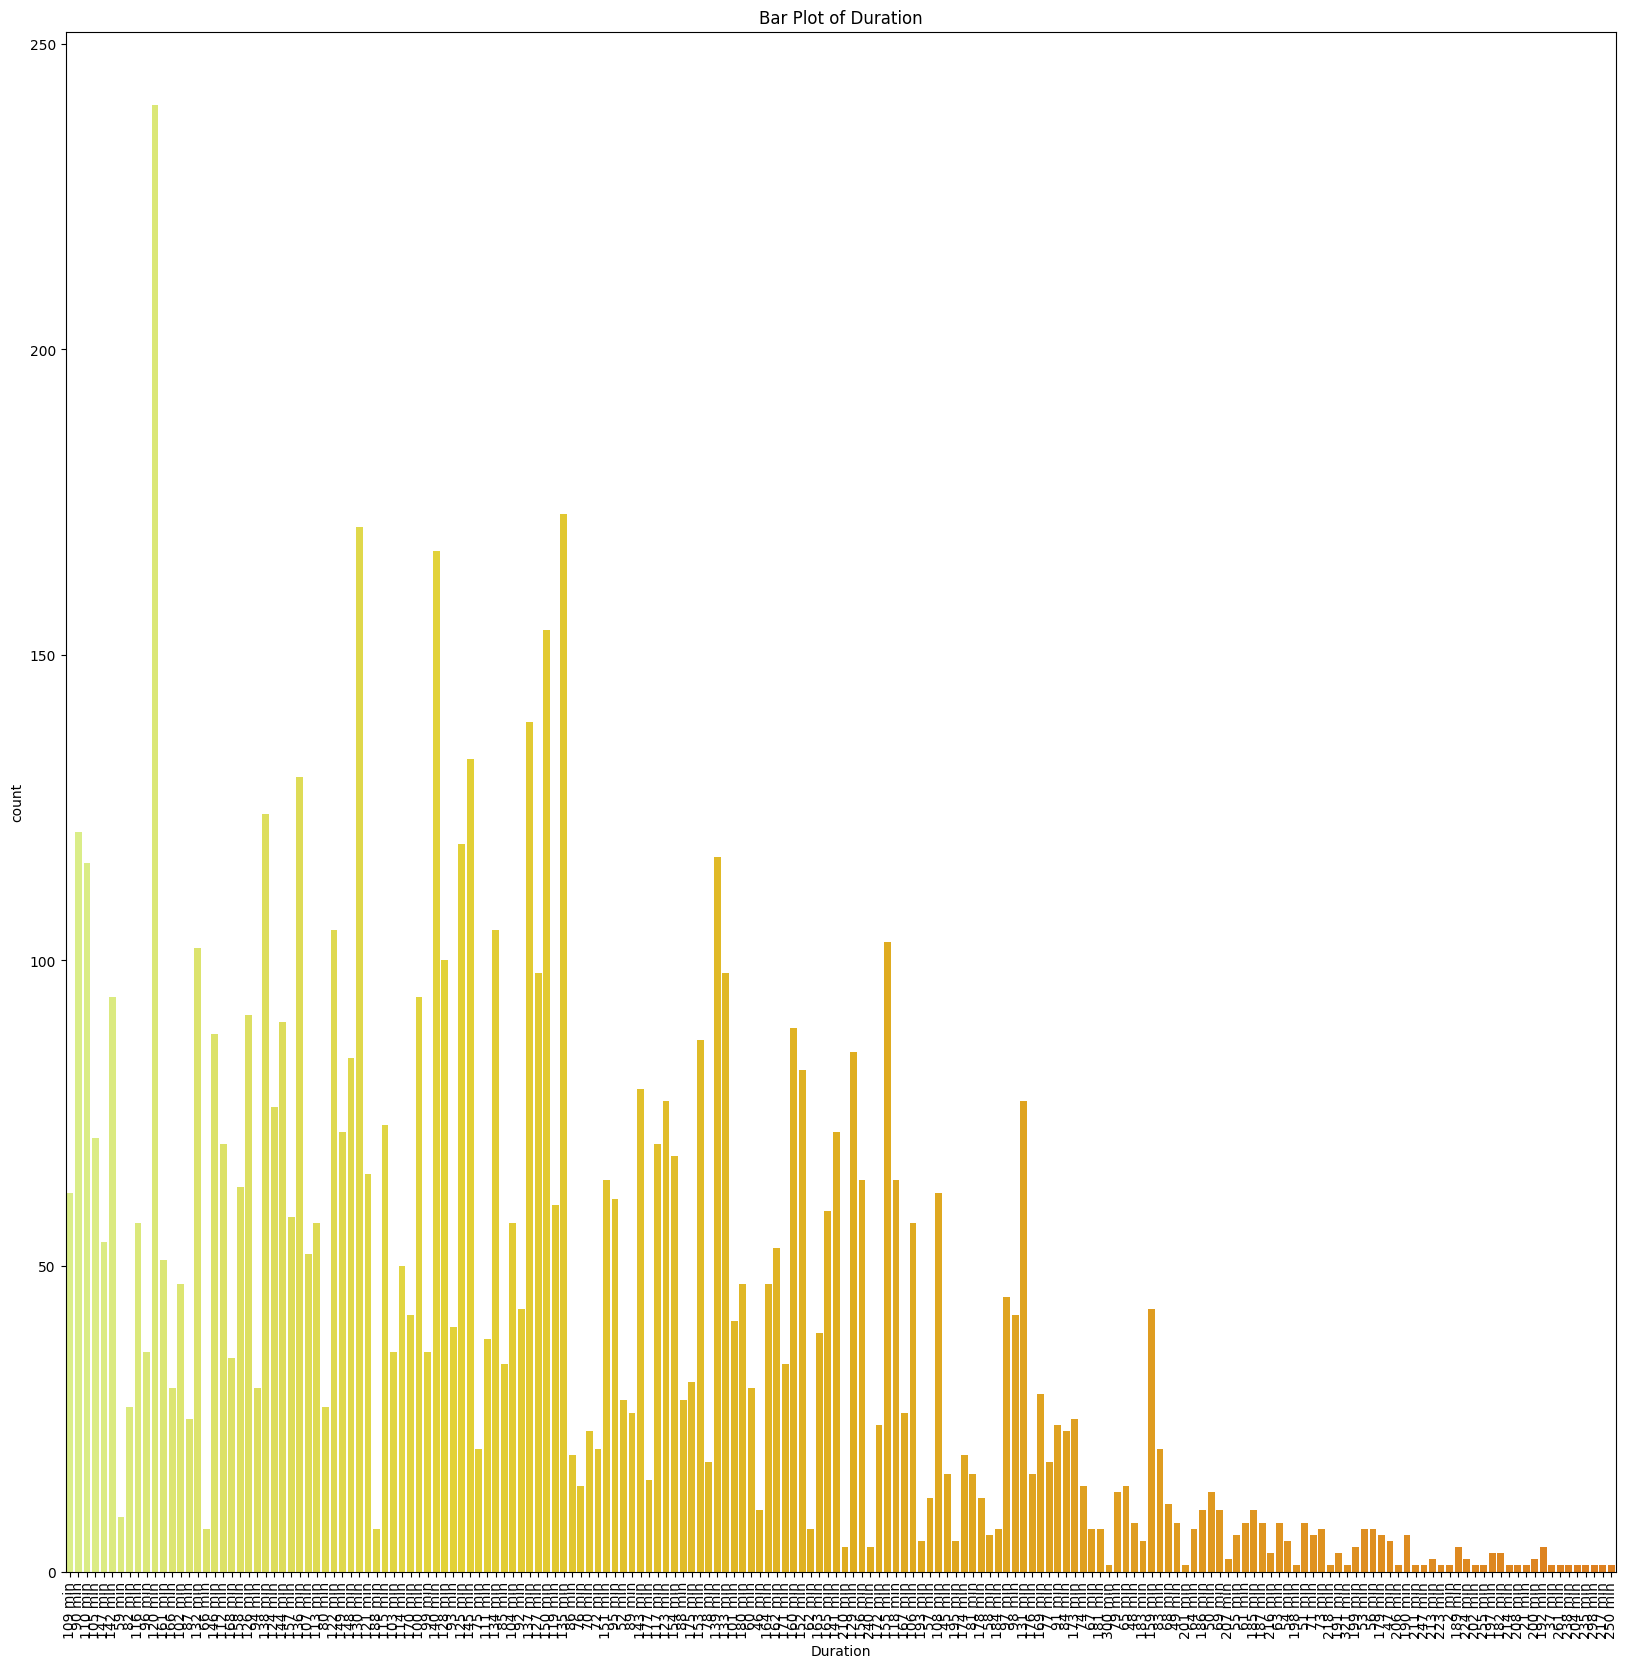

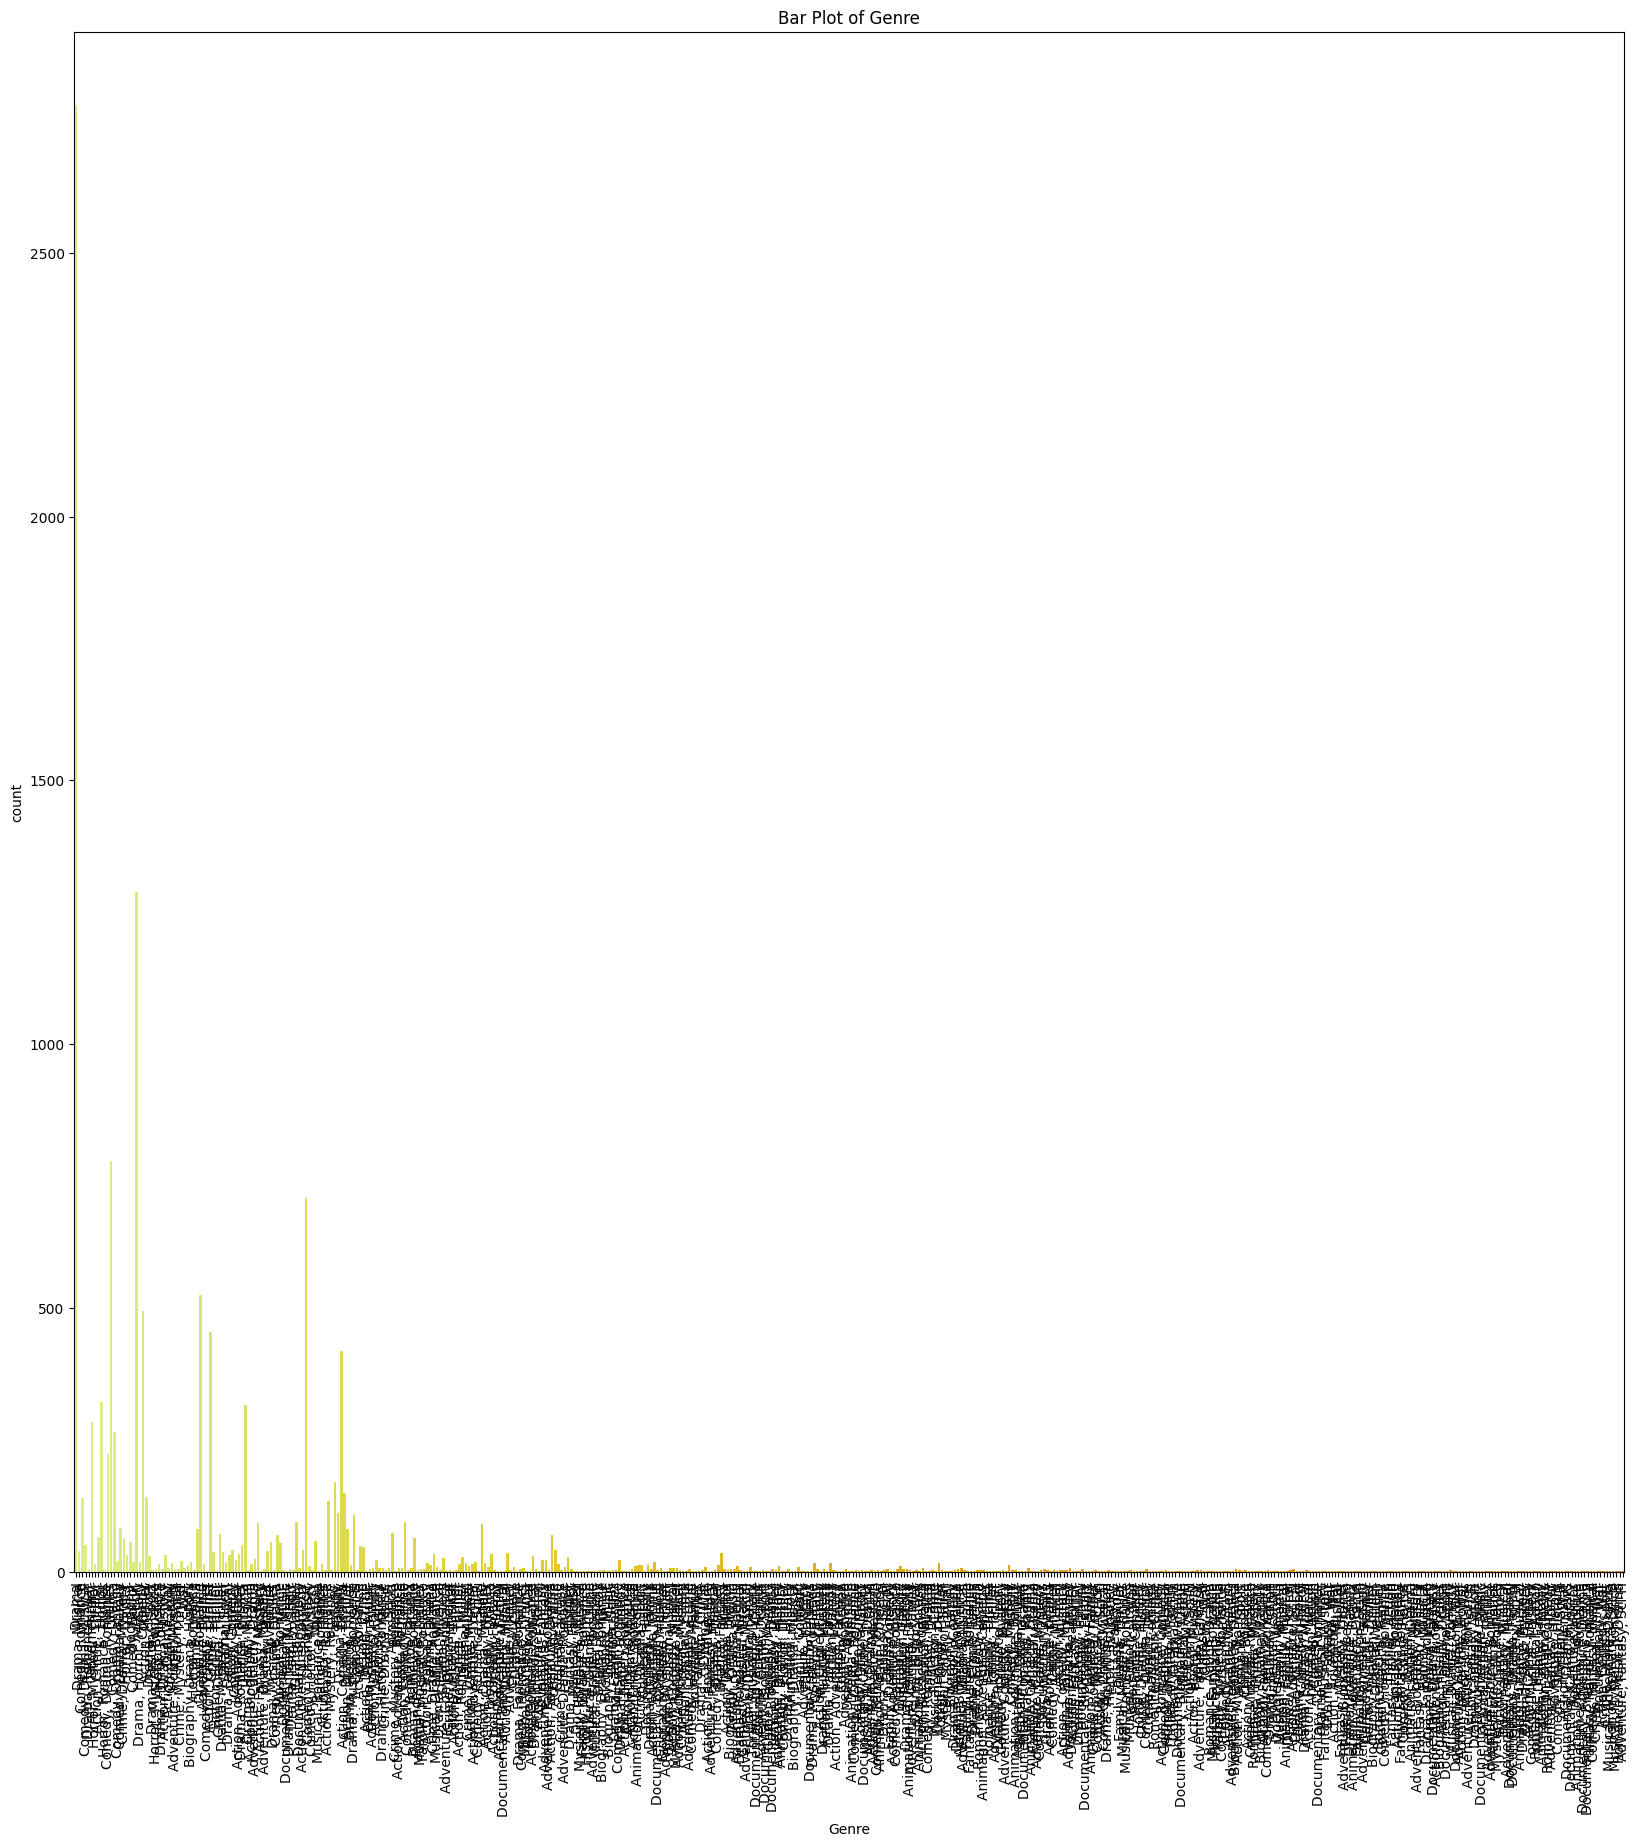

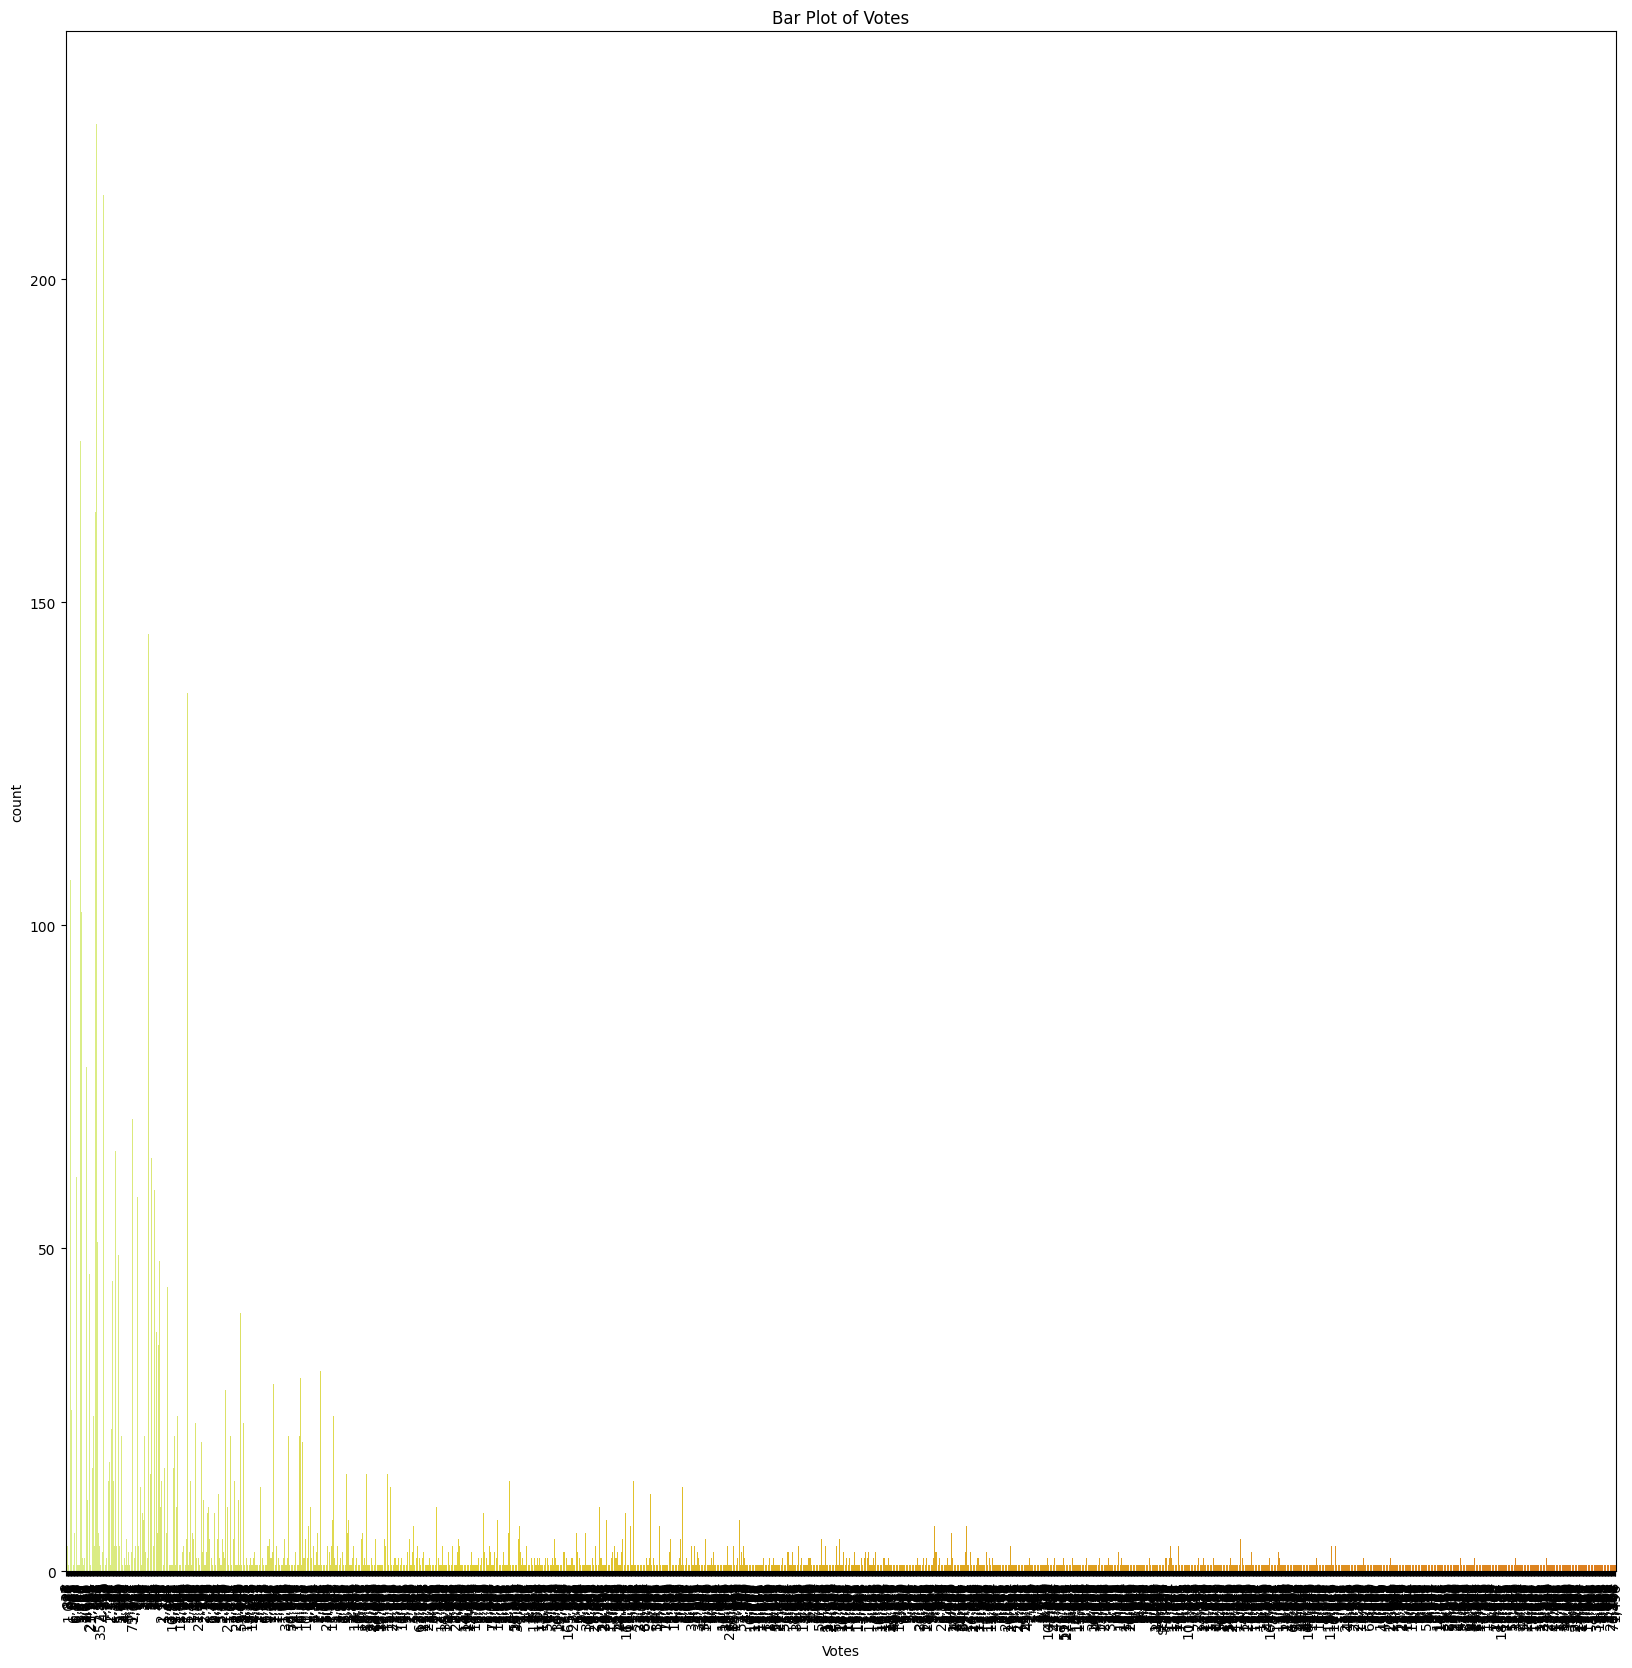

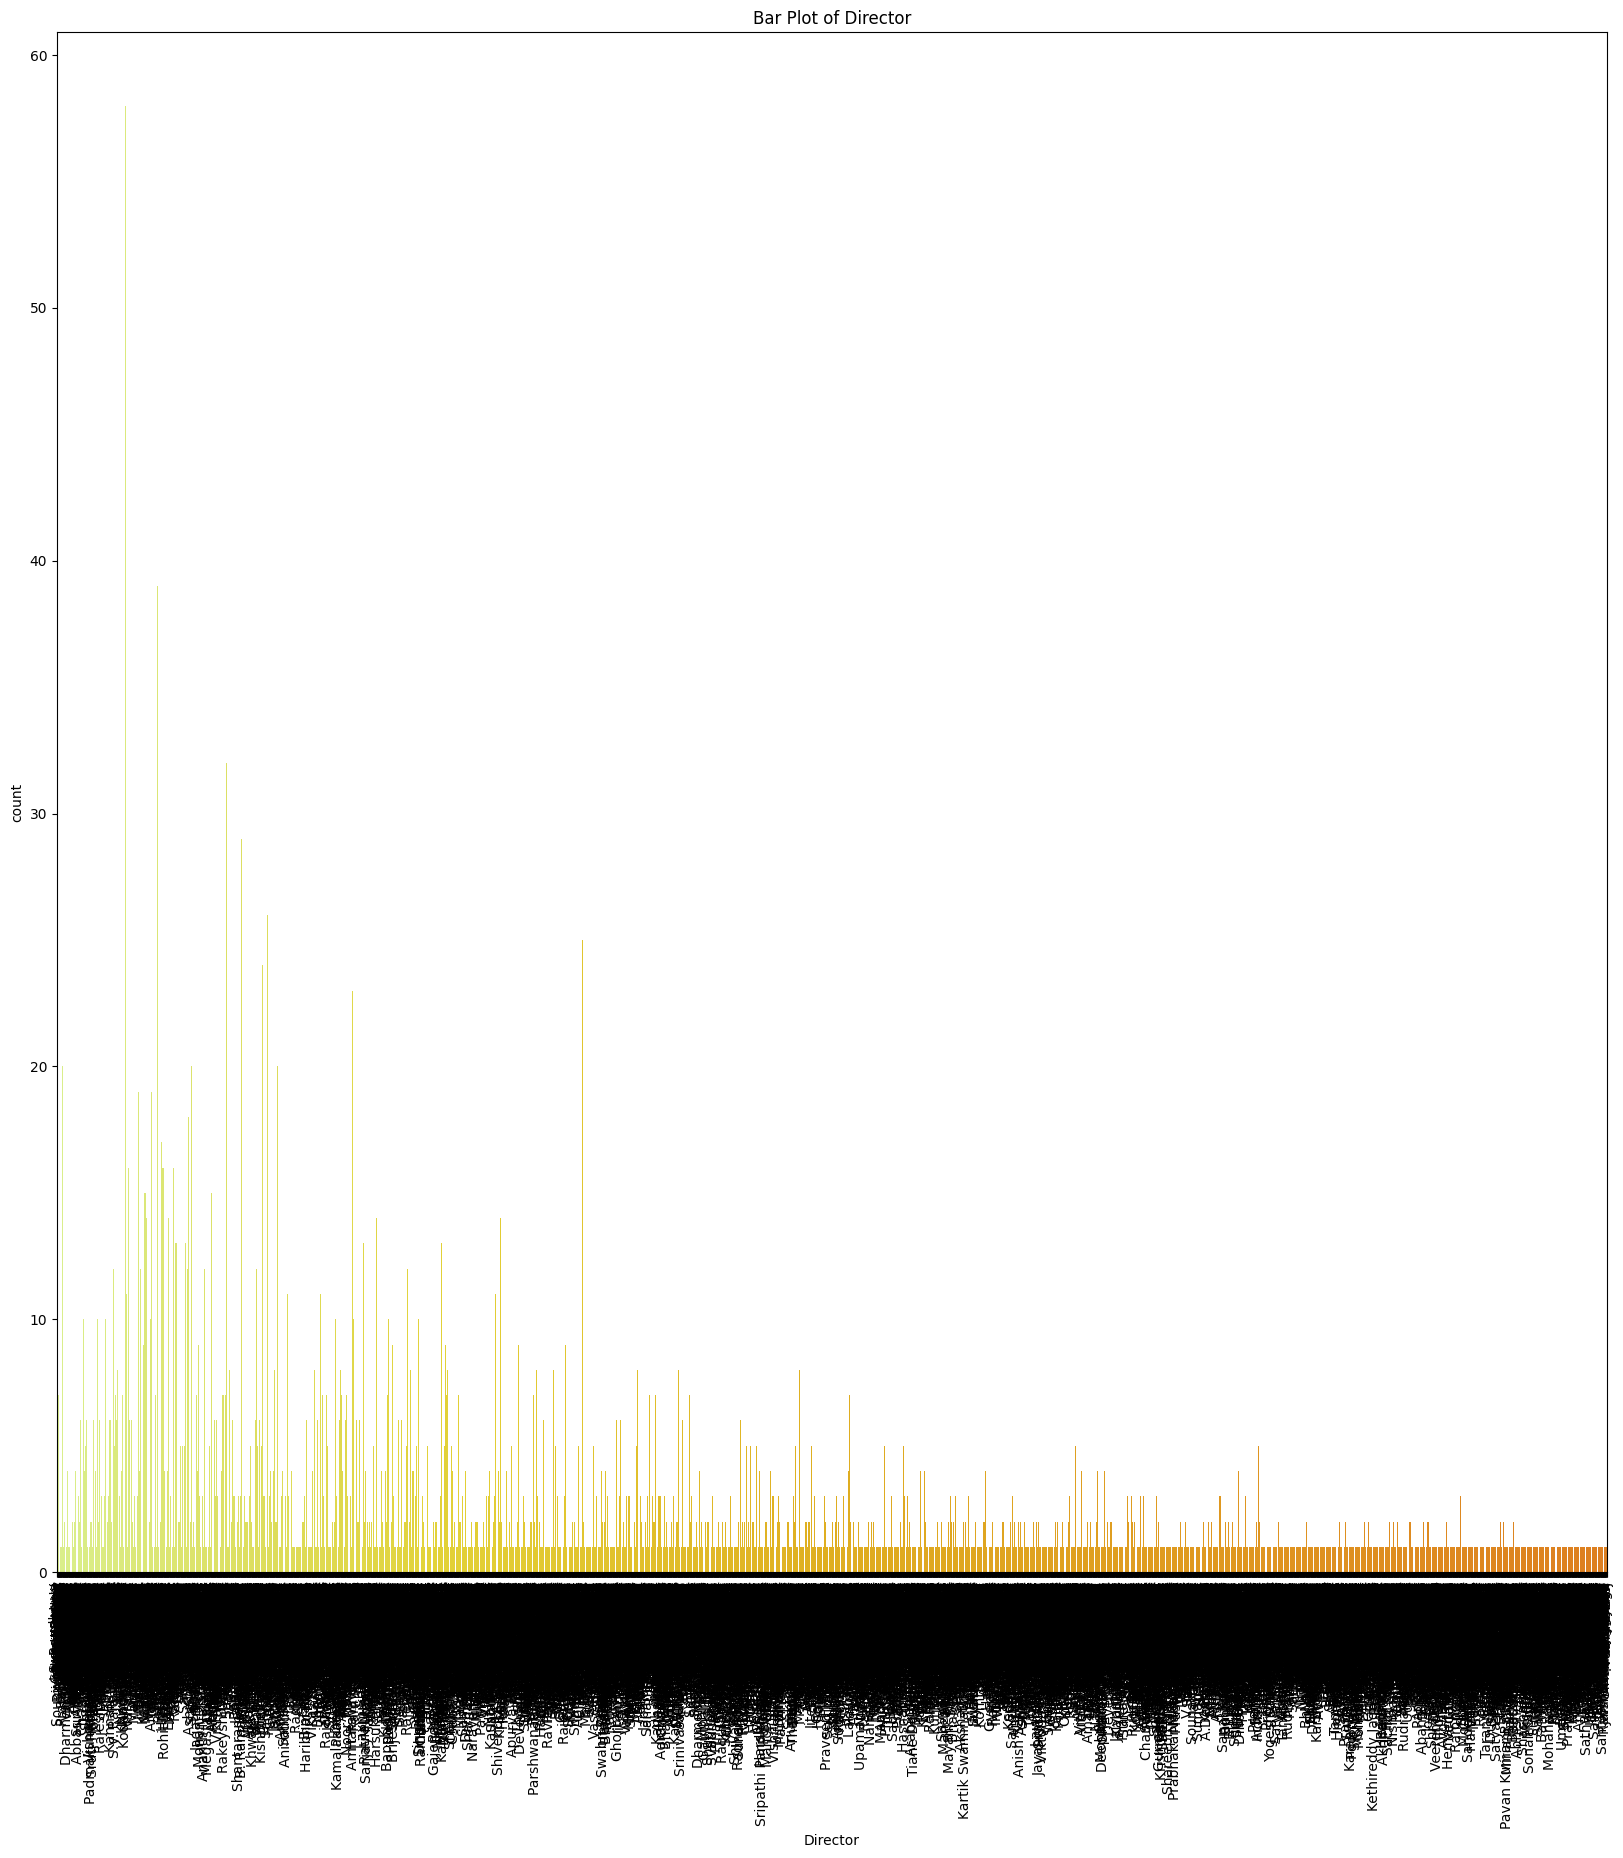

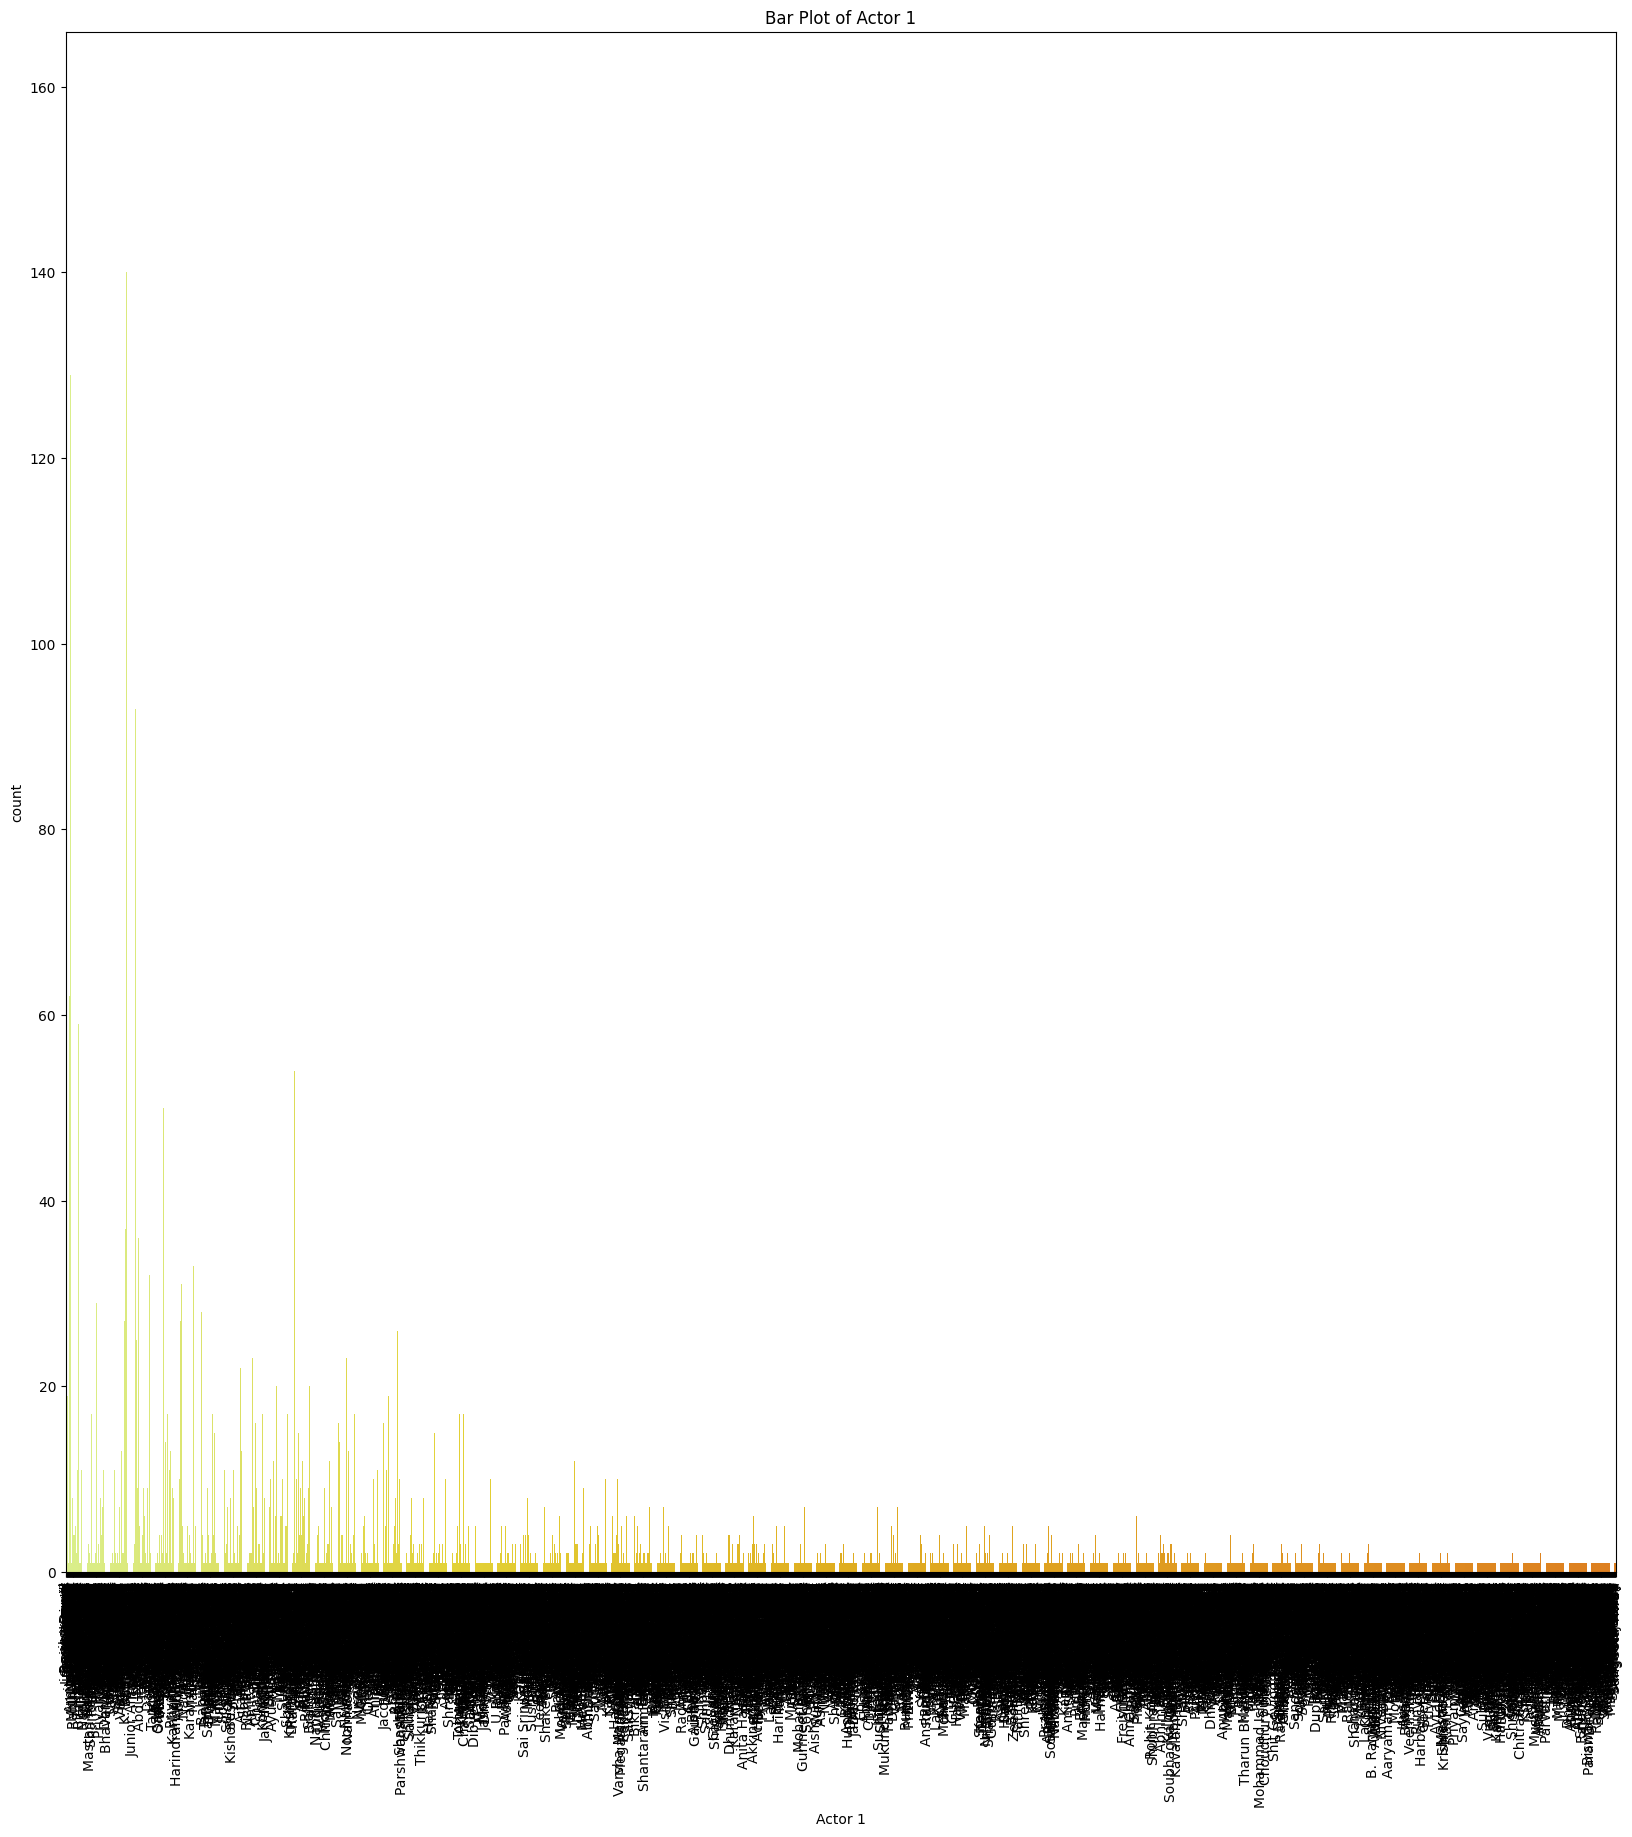

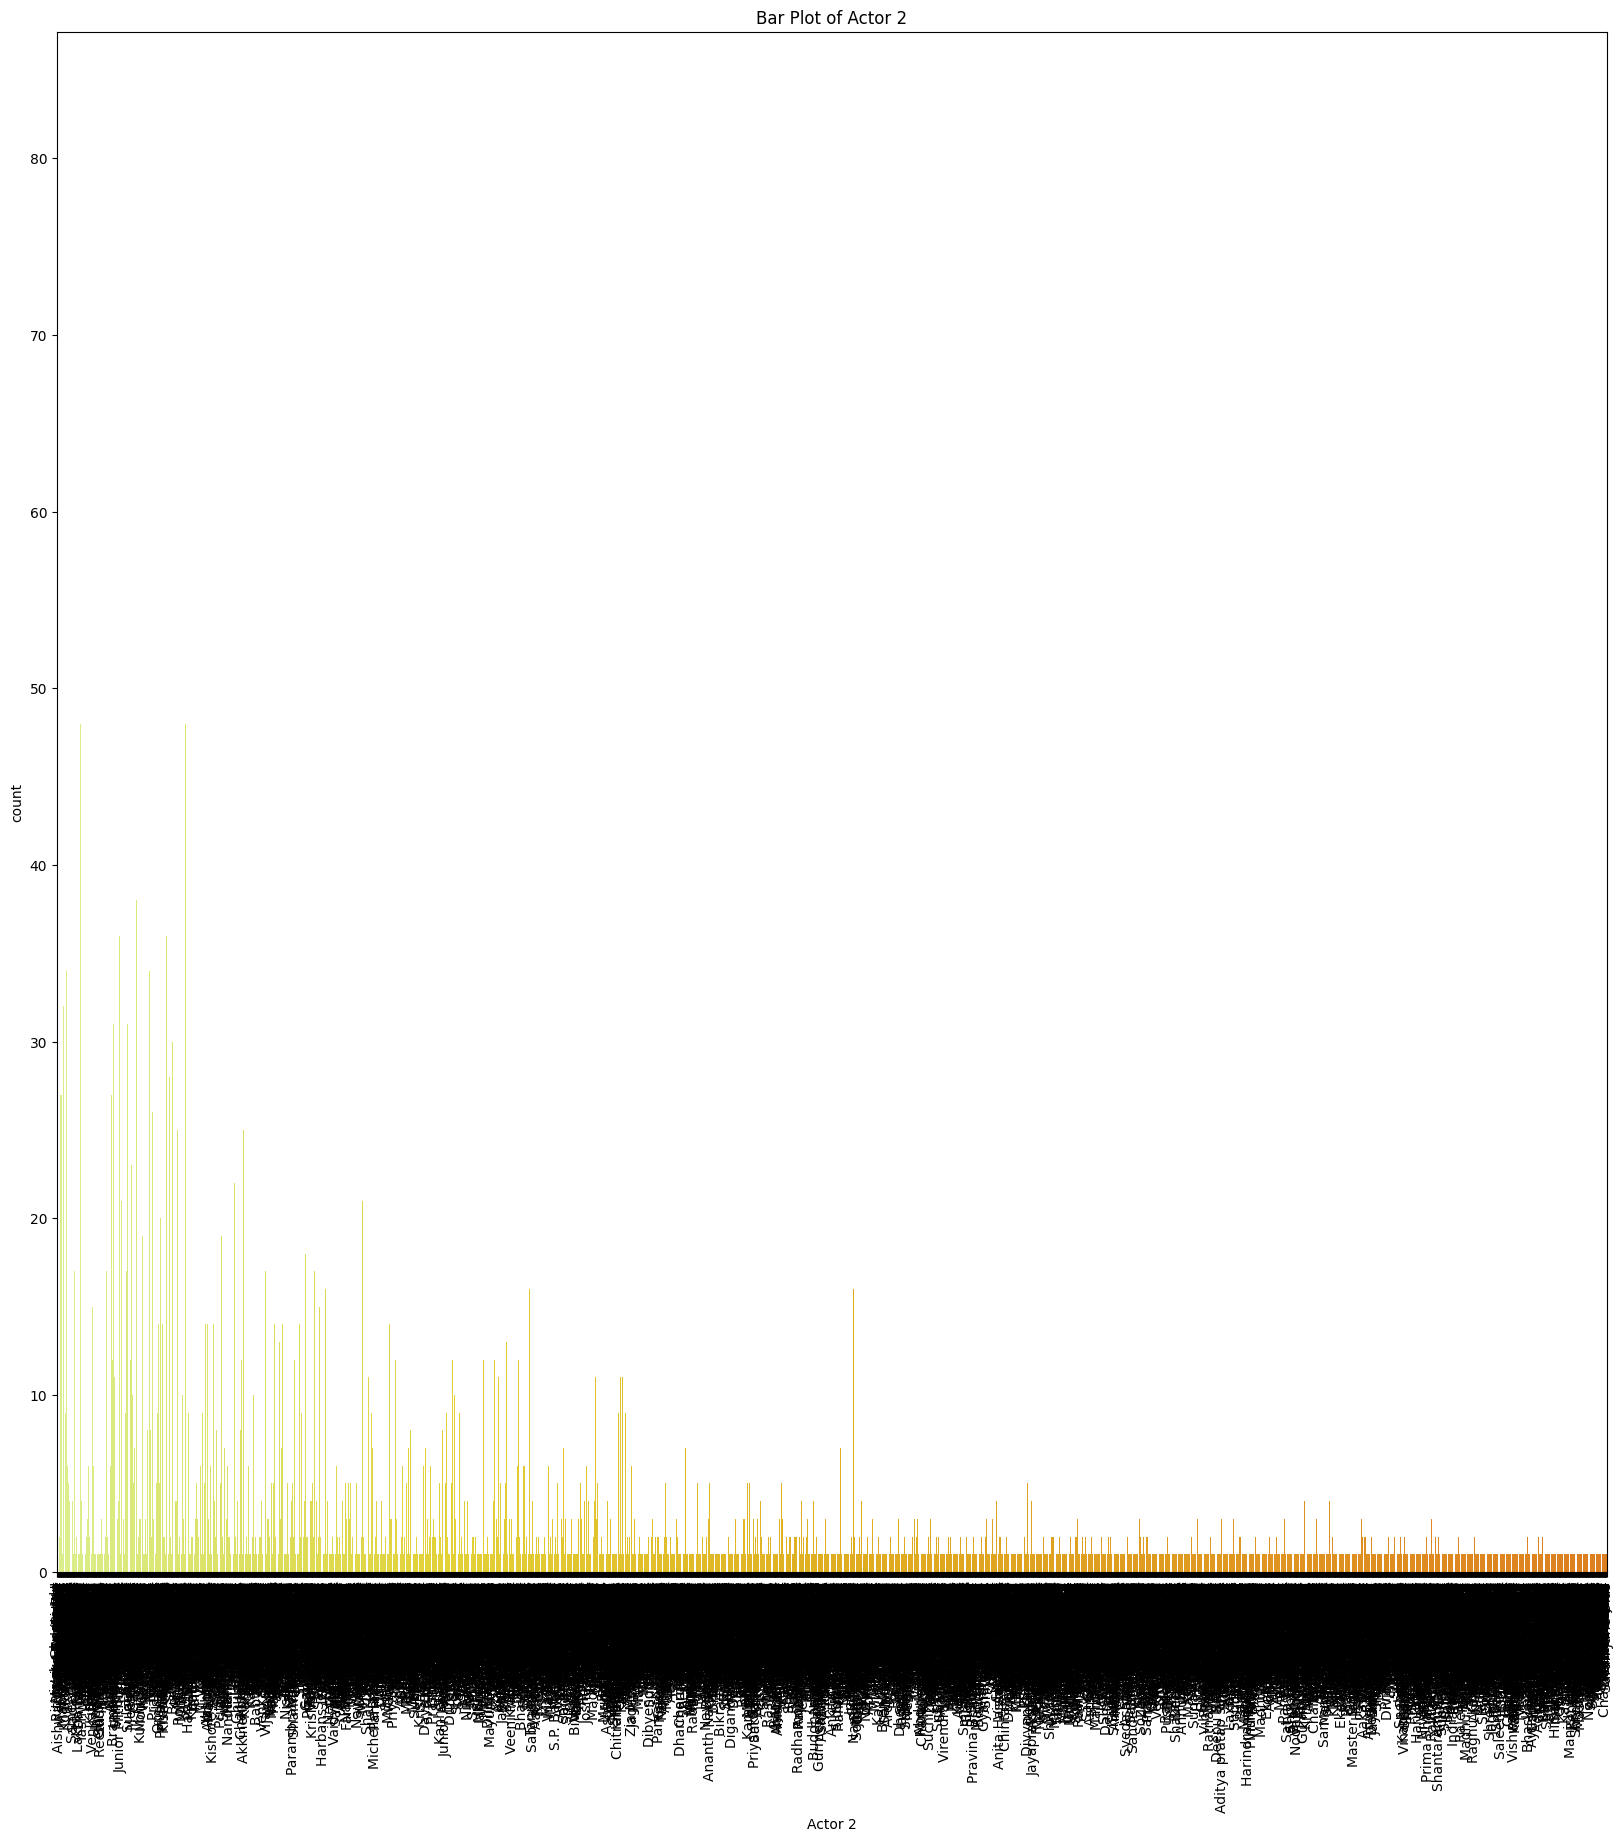

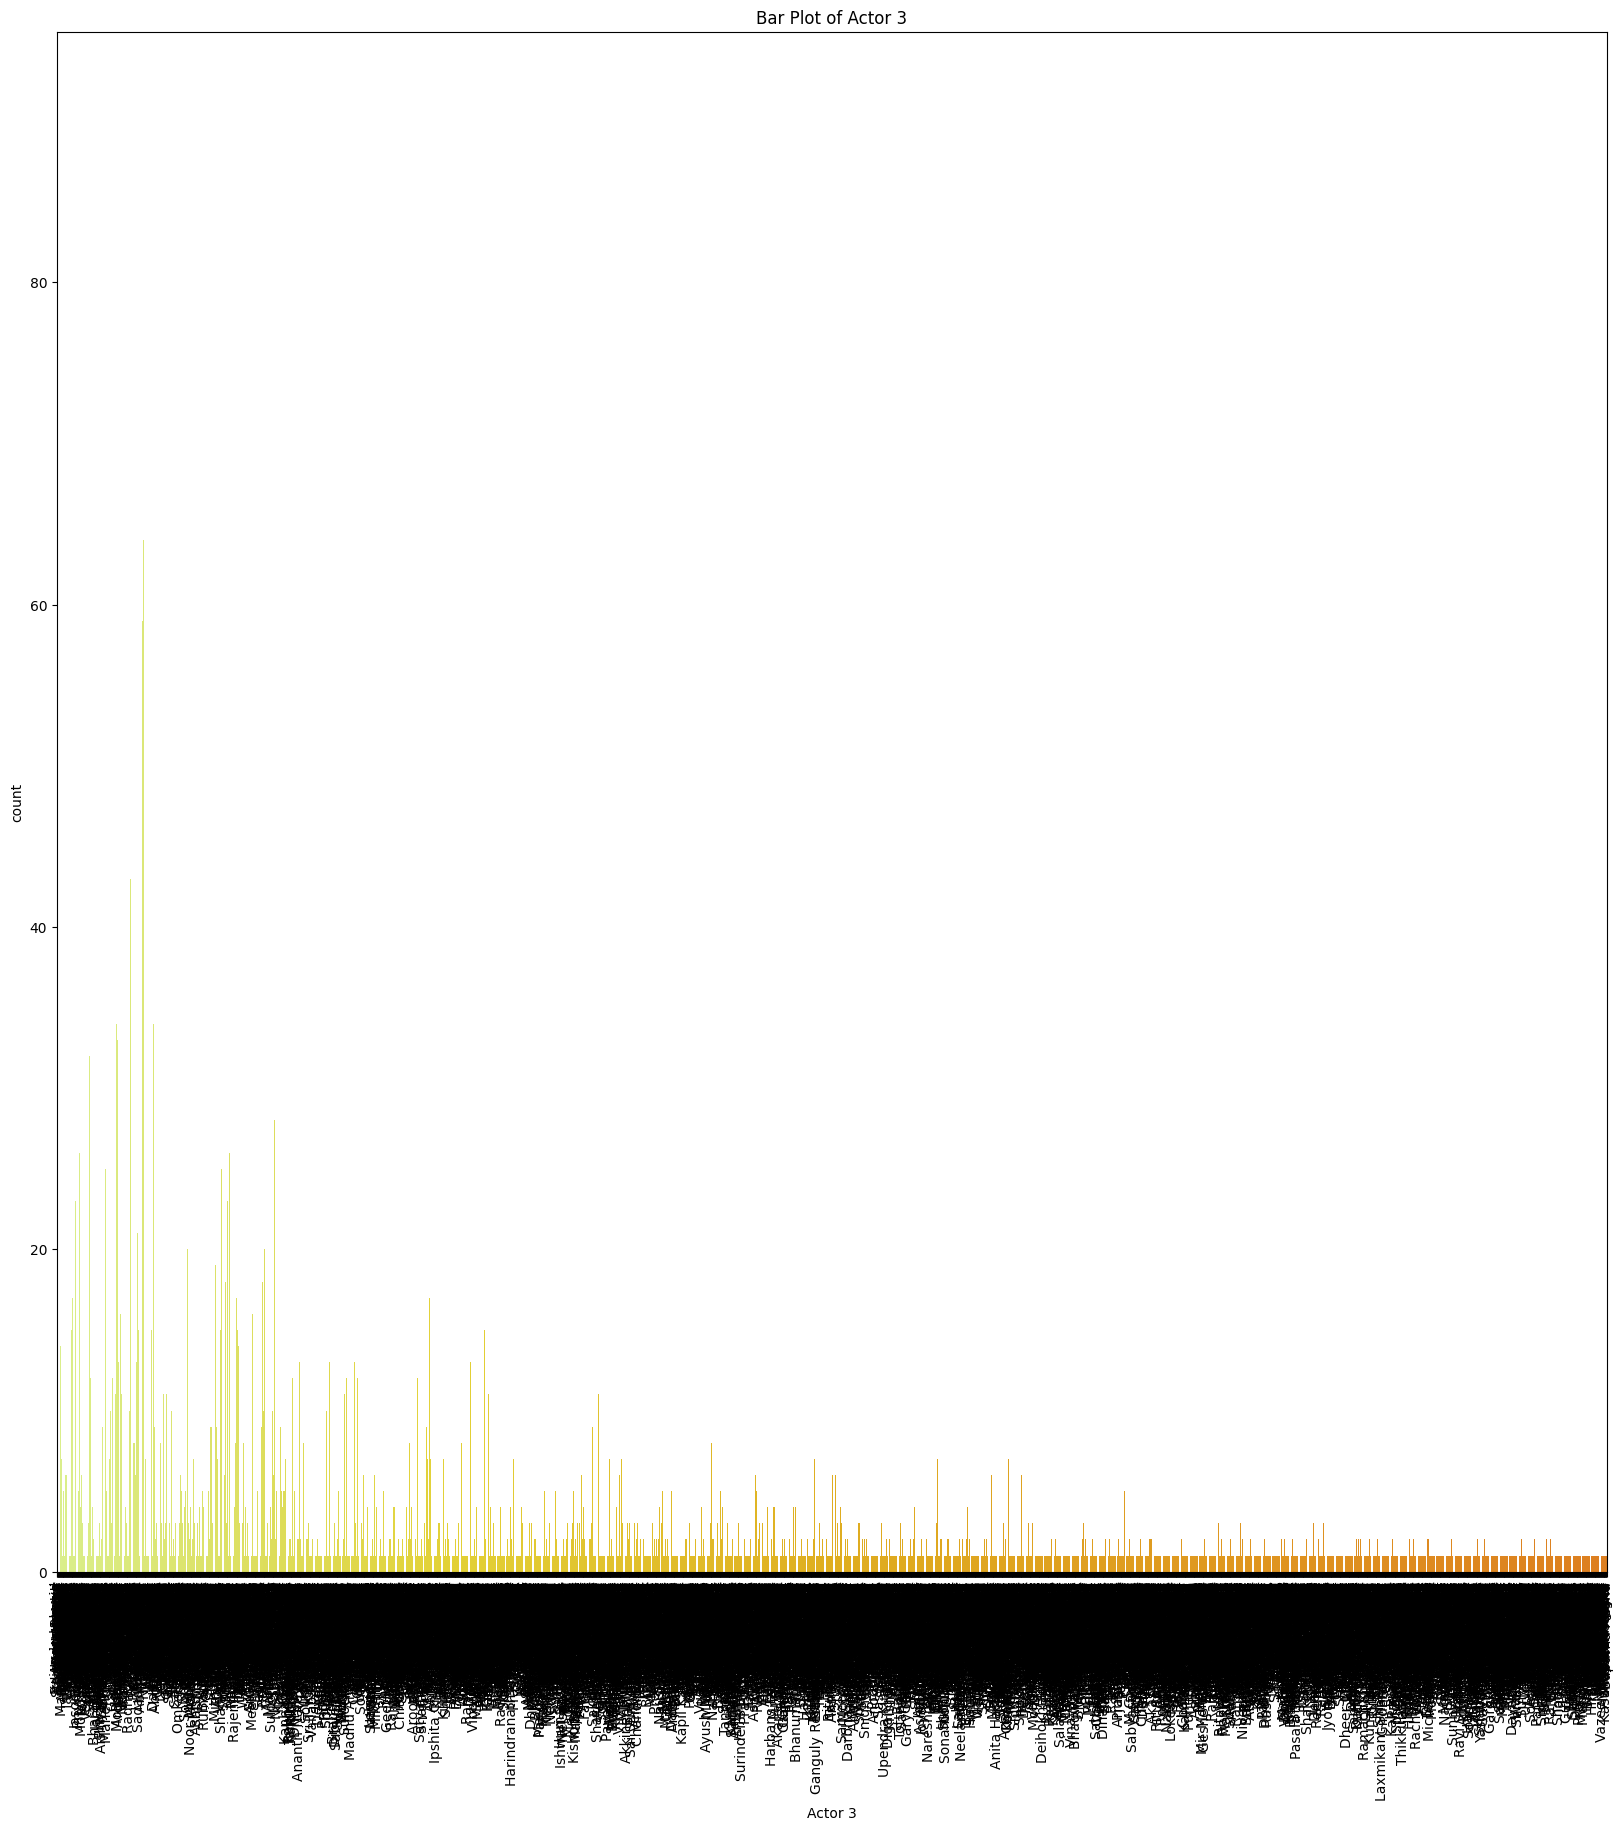

In [ ]:

for feature in cat_cols:
  plt.figure(figsize=(20,20))
  sns.countplot(x=feature , data=data , palette='Wistia')
  plt.title(f'Bar Plot of {feature}')
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.xticks(rotation=90)
  plt.show()

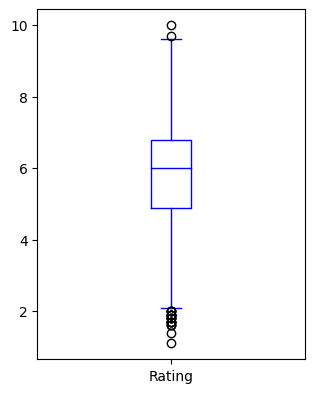

In [ ]:

data.plot(kind='box', subplots=True , layout=(2,5) , figsize=(20,10), color='blue')
plt.show()

<ipython-input-37-8fe35d16f9e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


        Rating
Rating     1.0


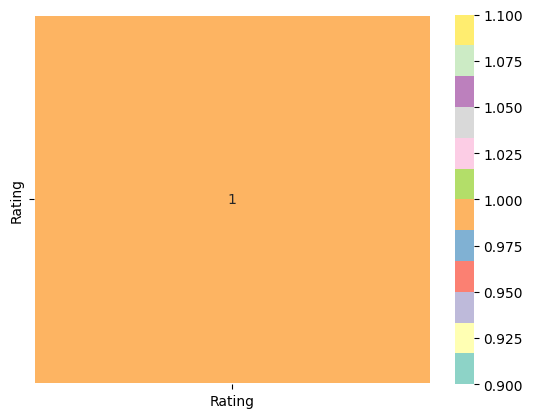

In [ ]:

corr = data.corr()
print(corr)

corr = corr[abs(corr)>=0.05]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.20)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data_encoded = data.apply(lb.fit_transform)
data_encoded

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0,102,182,299,84,2034,1926,2250,800,3108
1,1,98,9,299,56,1849,1549,3280,4790,527
2,2,100,172,351,84,2034,5123,3713,2866,3450
3,3,98,10,228,30,1169,3319,2917,1504,4020
4,7,89,5,299,84,2034,385,3112,3462,405
...,...,...,...,...,...,...,...,...,...,...
15504,13832,67,182,0,32,368,2690,2586,4299,4262
15505,13834,78,29,40,31,1687,2499,227,4532,519
15506,13835,84,182,0,84,2034,2424,3609,4891,4820
15507,13836,67,182,0,84,2034,5938,4718,4891,4820


In [ ]:
x = data_encoded.drop('Duration',axis=1)
y = data_encoded['Duration']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(15509, 9)
(15509,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(11631, 9)
(3878, 9)
(11631,)
(3878,)


In [ ]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
  acc = accuracy_score(y_test,y_pred)
  print('Accuracy Score',acc)
  cm = confusion_matrix(y_test,y_pred)
  print('Comfusion Matrix',cm)
  print('Classification Report',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [ ]:
mscore(dt)

Training Score 0.5328862522568997
Testing Score 0.5348117586384734


In [ ]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[182 182 182 ... 182 182 182]


In [ ]:
eval_model(y_test,ypred_dt)

Accuracy Score 0.5348117586384734
Comfusion Matrix [[   0    0    0 ...    0    0   21]
 [   0    0    0 ...    0    0   12]
 [   0    0    0 ...    0    0   12]
 ...
 [   0    0    0 ...    0    0    8]
 [   0    0    0 ...    0    0    8]
 [   0    0    0 ...    0    0 2070]]
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        24
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00        24
          10       0.00      0.00      0.00        31
          11       0.00      0.00      0.00       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import plot_tree


cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['Name', 'Year', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')
['no', 'yes']


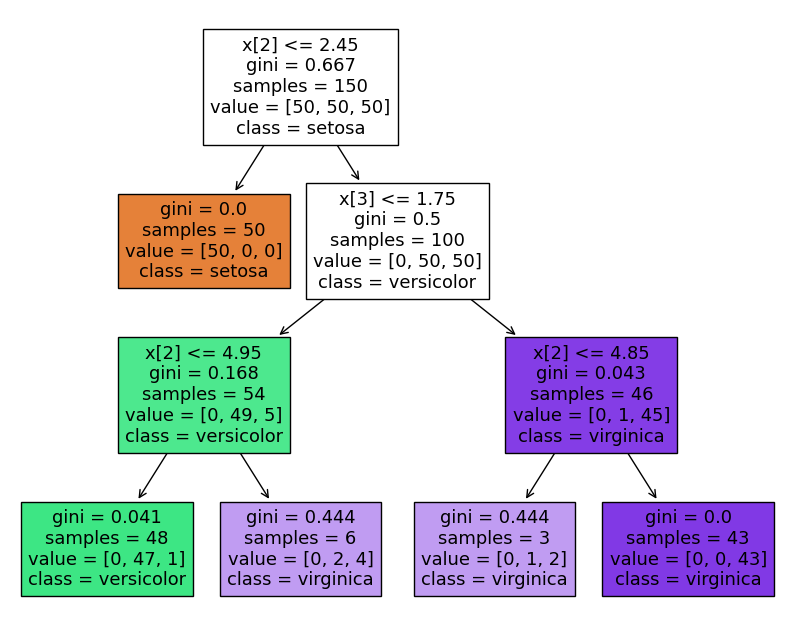

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Fit the decision tree classifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)

# Plot the decision tree with limited depth
plt.figure(figsize=(10, 8))
plot_tree(dt, filled=True, class_names=class_names)
plt.show()
